# Matrices - The extended concpet of matrices

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

## 5.1 Matrix norm
- Vector norm : 유클리드 기하학적 길이, 벡터 원소의 제곱합의 제곱근으로 계산
####
- Matrix norm 
    - 하나의 행렬은 여러개의 노름을 가진다. ||A|| 
    - 원소별 노름과 유도별(induced) 노름
- 원소별 노름
    - 유클리드 노름(원) = Frobenium Norm : 실제 벡터노름을 그대로 행렬에 확장한 것. 모든 행렬 원소의 제곱합의 제곱근으로 계산됨

1) 정규화 : 행렬 노름을 최소화 알고리즘에 비용함수로 추가하는 것. 모델 매게변수가 너무 커지거나, 희소 결과가 나오는 것을 방지한다
2) 행렬거리 계산 : 이 거리는 머신러닝 알고리즘에서 최적화 기준으로 사용될 수 있음

### 5.1.1 Trace and 프로베니우스 노름
- Trace: sum of diagonal elements, tr(A), only square matrix
- 프로베니우스 노름(전 요소 제곱합) =  어떤 행렬의 전치와 그 행렬을 곱한 결과의 대각합의 제곱근으로 계산할 수 있다

### Exercise 5

In [ ]:
# Create a matrix
M= 50
A = np.random.randn(M, M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A))) #trace!

# Euclidean norm mothod
norm2 = np.sqrt(np.sum(A**2))


# if they're equal, their difference should be (very close to) zero
norm1-norm2
     

0.0

## 5.2 Matrix space

### 5.2.1 Column space

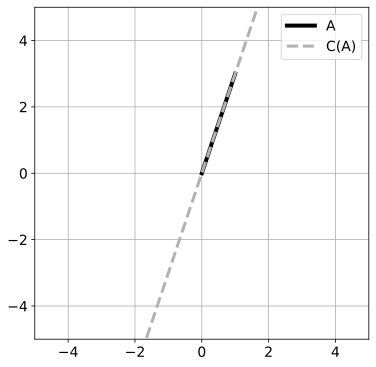

In [ ]:
# some matrix (just one lonely little column)
A  = np.array([ [1],[3] ])


# The column space contains an infinite number of points, but for computational convenience,
# we can draw the line using only two points
xlim = [-5,5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

plt.figure(figsize=(6,6))

plt.plot([0,A[0,0]],[0,A[1,0]],'k',linewidth=4,label='A')
plt.plot([colspace_p1[0,0],colspace_p2[0,0]],[colspace_p1[1,0],colspace_p2[1,0]],
         '--',linewidth=3,color=[.7,.7,.7],label='C(A)')
plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.show()

# C(A) : Matrix A's columns space, 열백터 [1, 3]의 크기를 변경해서 만들 수 있는 모든 벡터들의 집합

행렬의 열공간에 벡터가 있는지 여부를 확인하는 정량적 방법에서는 행렬 계수 개념을 활용합니다. 
그전에는 행렬의 열이 벡터 부분공간을 구성한다는 직관에 초점을 맞추세요. 
이 부분공간은 전체 M 차원 공간이 되거나 아니면 더 작은 차원의 부분공간이 될 수 있습니다. 
그리고 중요한 부분은 어떤 다른 벡터가 그 부분공간 안에 있는지 여부입니다(행렬의 열들의 선형 가중 결합해서 표현될 수 있는지를 의미)


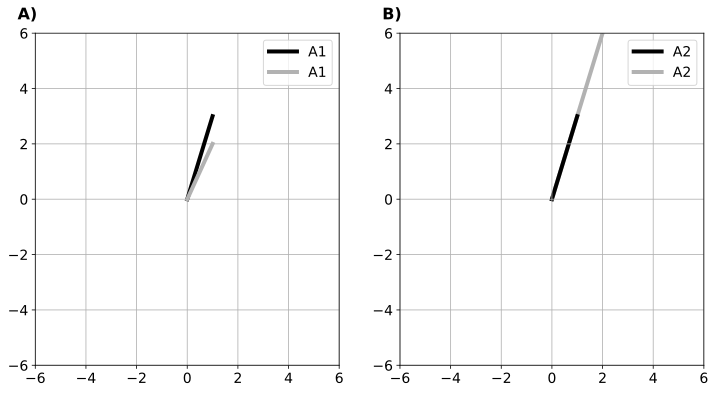

In [ ]:
# some matrix
A1  = np.array([ [1,1],[3,2] ])
A2  = np.array([ [1,2],[3,6] ])


# some other plotting specifications
xlim = [-6,6]
color = [ [0,0,0],[.7,.7,.7] ]


# make the plot
_,axs = plt.subplots(1,2,figsize=(12,6))

# loop over columns
for i in range(2):
  axs[0].plot([0,A1[0,i]],[0,A1[1,i]],color=color[i],linewidth=4)
  axs[1].plot([0,A2[0,i]],[0,A2[1,i]],color=color[i],linewidth=4,zorder=-i)
  
  # set some axis properties
  axs[i].set_xlim(xlim)
  axs[i].set_ylim(xlim)
  axs[i].grid()
  axs[i].text(xlim[0]-.7,xlim[1]+.5,f'{"AB"[i]})',fontweight='bold',fontsize=16)

# set the legends and subplot letters
for i in [0,1]: axs[i].legend([f'A{i+1}',f'A{i+1}'])

plt.show()


# A) : 두 벡터의 선형결합으로 생성될 수 있는 모든 벡터들의 집합은 2차원 실수 벡터 공간
# B) : 선(1차원 부분 공간)

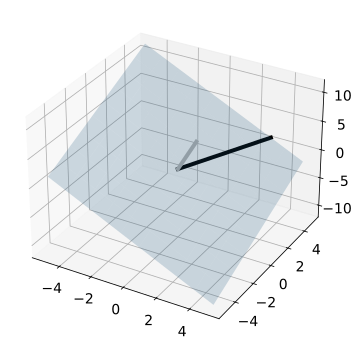

In [ ]:
# a matrix with two columns in R3
A = np.array( [ [3,0],
                [5,2],
                [1,2] ] )


# create a 3D graph
ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

# draw plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
ax.plot_surface(xx,yy,z1,alpha=.2)


## plot the two vectors from matrix S
ax.plot([0, A[0,0]],[0, A[1,0]],[0, A[2,0]],color=color[0],linewidth=4)
ax.plot([0, A[0,1]],[0, A[1,1]],[0, A[2,1]],color=color[1],linewidth=4)

plt.show()

# 2-dimentional plain space on R3 ( two lines : vectors )
     

### 5.2.3 Null spaces
- Ax = 0을 만족하는 x의 집합 (컬럼들의 선형 결합이 0이 되도록 하는 계수 x 의 집합)

##
- 행렬의 열이 선형 독립 집합이라면 영공간이 비어 있다는 것
- 최대 계수와 최대열 계수 행렬은 빈 영공간을 가지지만 축소계수 행렬의 영공간은 비어 있지 않다.

##
- 고유벡터와 특이 벡터를 찾는데 핵심적인 역할을 한다

In [13]:
# The two matrices
A = np.array([ [1,-1],[-2,2] ])
B = np.array([ [1,-1],[-2,3] ])

# null spaces
print( scipy.linalg.null_space(A) ) # return unit vector 
print(' ')

print( scipy.linalg.null_space(B) ) # empty

[[0.70710678]
 [0.70710678]]
 
[]


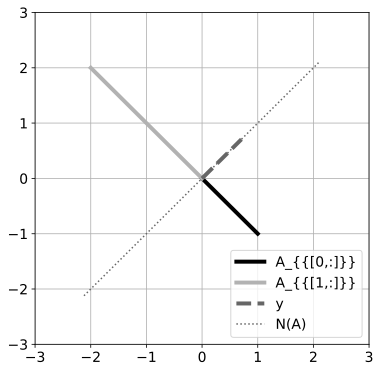

In [ ]:
# 🔴 여기는 어려워서 꼭 다시 back!
# Using matrix A above
nullvect = scipy.linalg.null_space(A)


# some other plotting specifications
xlim = [-3,3]
color = [ [0,0,0],[.7,.7,.7] ]


# make the plot
plt.figure(figsize=(6,6))

# plot the rows
for i in range(2):
  plt.plot([0,A[i,0]],[0,A[i,1]],color=color[i],linewidth=4,label='A_{{[%g,:]}}'%i)

# plot the nullspace vector
plt.plot([0,nullvect[0,0]],[0,nullvect[1,0]],'--',color=[.4,.4,.4],
         linewidth=4,label='y')

# plot the rest of the nullspace
plt.plot([xlim[0]*nullvect[0,0],xlim[1]*nullvect[0,0]],
         [xlim[0]*nullvect[1,0],xlim[1]*nullvect[1,0]],
         ':',color=[.4,.4,.4],label='N(A)')

# set some axis properties
plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.legend()

plt.show()

# 영공간 벡터와 각 행사이의 내적은 0 이다

## 5.3 Rank
- 행렬이 가지는 independent 한 column의 수  = column space의 dimension
- independent 한 column의 수 = indenpendt한 row의 수
###
- 하나의 행렬과 연관된 고유 숫자
- 행렬 부분공간의 차원의 수와 관련이 있으며, 역행렬이나 방정식의 정답의 수를 결정하는 등의 행렬 연산에서는 중요한 의미를 가진다

###
- 행렬의 열공간과 행공간이 다르지만, 행렬공간의 **차원의 수**는 동일하다
- 계수는 선형 독립 집합을 형성할 수 있는 최대 열(행)의 수이며, 이는 행렬의 열공간(행공간)의 차원의 수에도 해당한다는 것!!

### 5.3.1 Special metrix rank
- Vector : 1
- Zeors matrix : 0
- Identity matrix : count of row(column)
- Symmetric matrix : 0이 아닌 대각 원소의 수와 같음
- Triangular matrix : full rank & reduced rank
- Random matrix
- Rank-1 matrix


### 5.3.2 addtion and multiplication matrix of rank

### 5.3.3. Rank of the shifted matrix

## 5.4 Applications of rank

### 5.4.1 Is the vector in the column space?

### 5.4.2. Linear independence of a set of vectors
벡터 집합이 선형적으로 독립적인지 여부를 확인하기
- 벡터를 행렬에 넣고 행렬의 계수를 계산한 다음 해당 행렬의 최대로 가능한 계수와 비교하기
    - r = N : 벡터 집합은 선형적으로 독립
    - r < N : 벡터 집합은 선형적으로 종속

## 5.5 Determinant
1) Only square matrix
2) Linear dependence & determinant - all 축소 계수 행렬의 행렬식은 0이다 ⭐️

### 5.3.3 Characteristic polynominal
- 행렬 이동과 행렬식을 결합하는 것
- 모든 정방 행렬을 방정식으로 표현할 수 있다
- 행렬식이 = 0 이 되는 특성 다항식에 대한 해는 행렬의 고윳값이다.